In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
data= pd.read_csv('Big_Mart_Sales.csv')

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
data.shape

(8523, 12)

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
values = {'Item_Weight':data['Item_Weight'].mean(),'Outlet_Size':'others'}

In [15]:
data.fillna(value=values,inplace=True)

In [16]:
numerical_col = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']


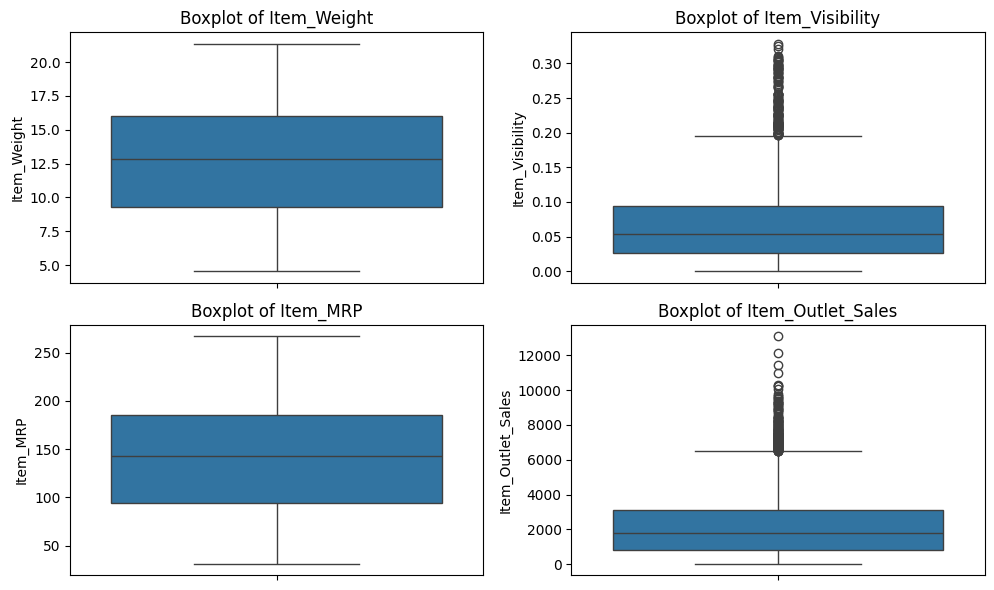

In [ ]:
plt.figure(figsize=(10,6))
for i , col in enumerate(numerical_col,1):
    plt.subplot(2,2,i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [18]:
# Detecting outliers using IQR method
for col in numerical_col:
    Q1 = data[col].quantile(0.25)   # First quartile (25th percentile)
    Q3 = data[col].quantile(0.75)   # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile Range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]



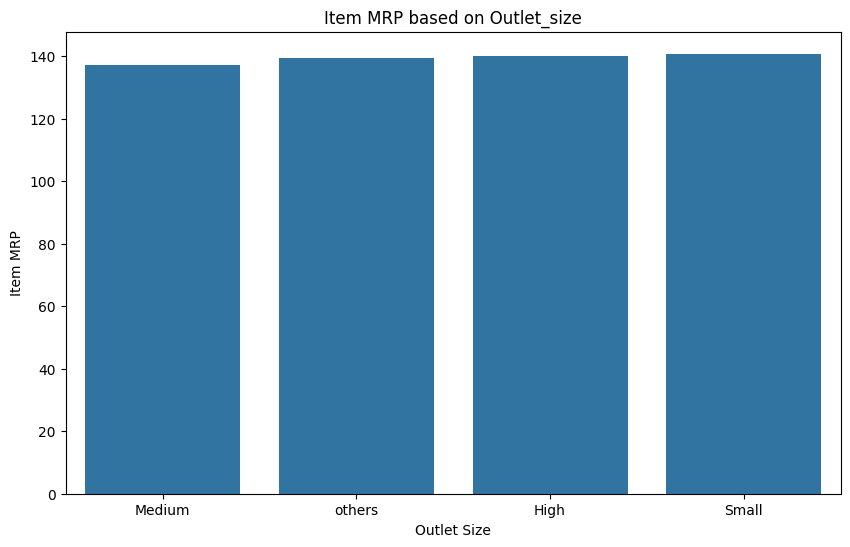

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['Outlet_Size'],y=data['Item_MRP'],errorbar=None)
plt.title("Item MRP based on Outlet_size")
plt.xlabel('Outlet Size')
plt.ylabel('Item MRP')
plt.show()

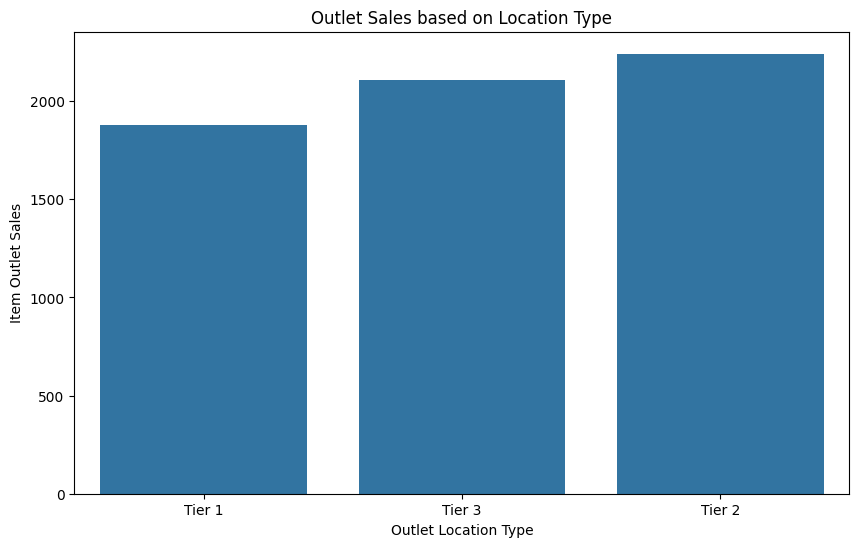

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['Outlet_Location_Type'],y=data['Item_Outlet_Sales'],errorbar=None)
plt.title('Outlet Sales based on Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

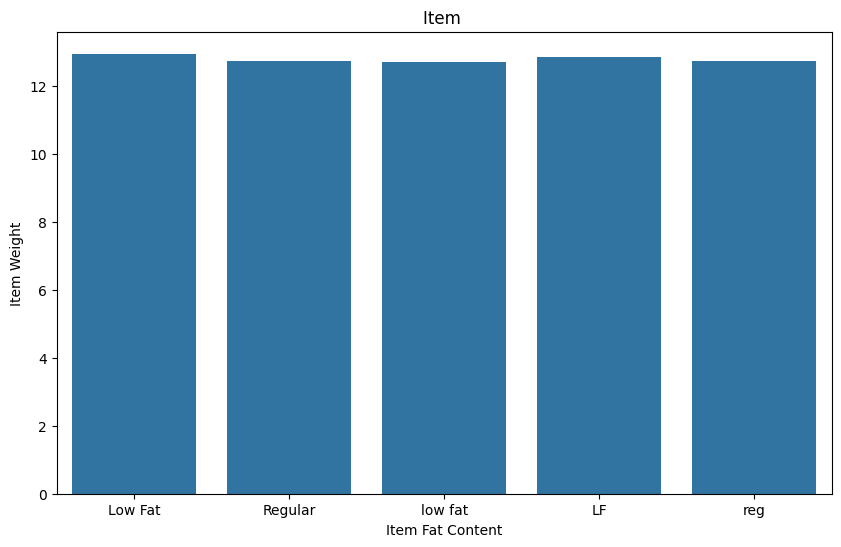

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['Item_Fat_Content'],y=data['Item_Weight'],errorbar=None)
plt.title('Item ')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Weight')
plt.show()

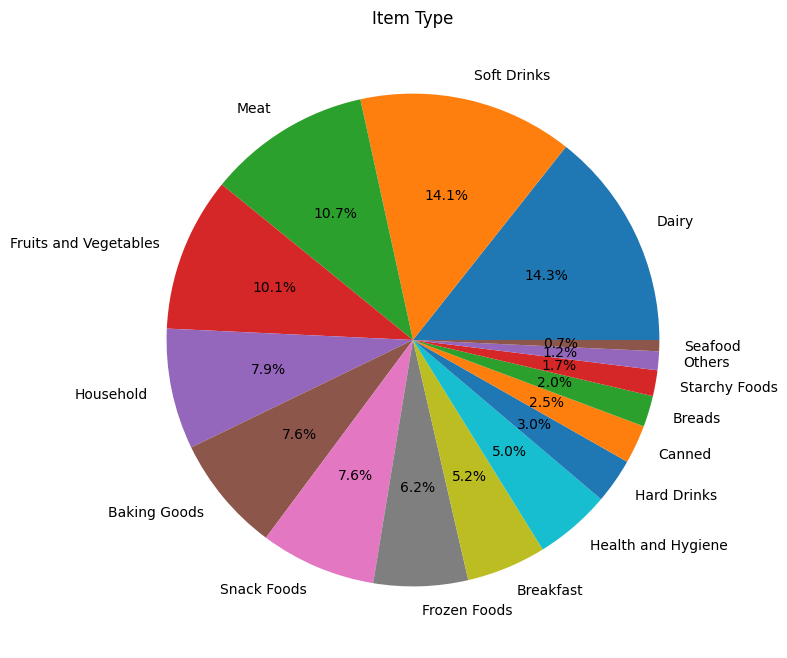

In [22]:
plt.figure(figsize=(10,8))
plt.pie(data['Item_Type'].value_counts(),labels=data['Item_Type'].unique(),autopct='%1.1f%%')
plt.title('Item Type')
plt.show()

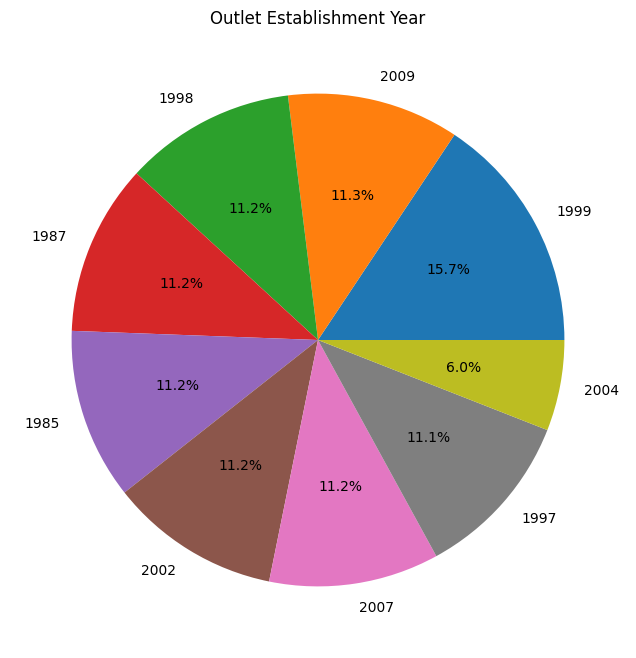

In [23]:
plt.figure(figsize=(10,8))
plt.pie(data['Outlet_Establishment_Year'].value_counts(),labels=data['Outlet_Establishment_Year'].unique(),autopct='%1.1f%%')
plt.title('Outlet Establishment Year')
plt.show()

In [24]:
numerical_cols = data.select_dtypes(['float64','int64'])
numerical_cols

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


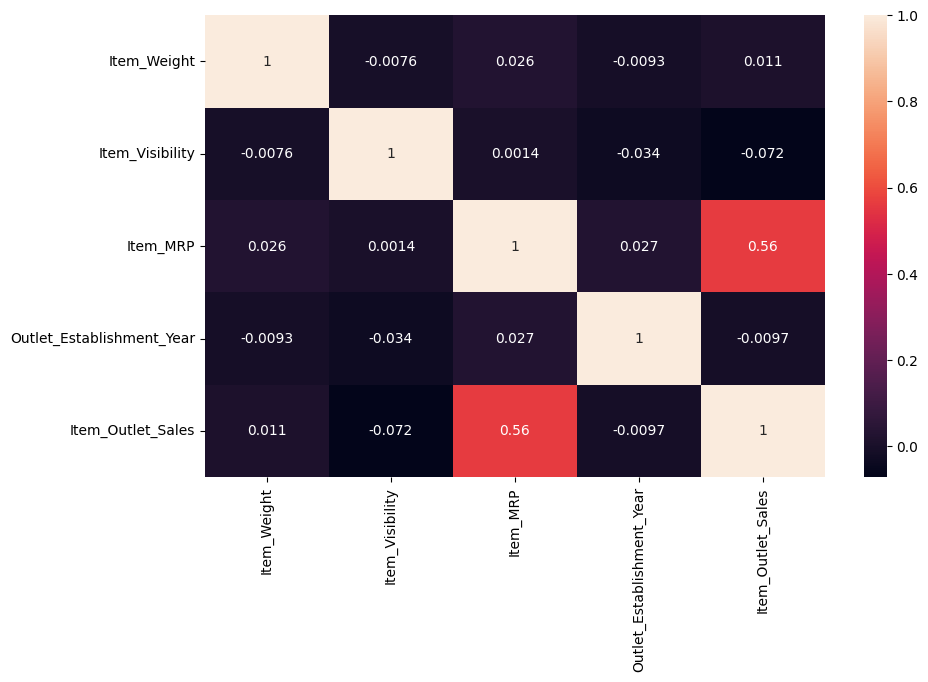

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_cols.corr(),annot=True)
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error ,mean_squared_error ,root_mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [27]:
X = numerical_cols.drop(columns='Item_Outlet_Sales')
y =numerical_cols['Item_Outlet_Sales']

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [29]:
SS = StandardScaler()

X_train_scaled = SS.fit_transform(X_train)

X_test_scaled = SS.transform(X_test)


In [ ]:
model1 = LinearRegression()

model1.fit(X_train_scaled,y_train)

y_pred = model1.predict(X_test_scaled)

LinearRegression()

In [ ]:
mae = mean_absolute_error(y_test,y_pred)

print(f"Mean absoulte error {mae:.2f}")

Mean absoulte error 957.63


In [39]:
mse= mean_squared_error(y_test,y_pred)

print(f"Mean squared error {mse:.2f}")

Mean squared error 1575463.56


In [40]:
rmse = root_mean_squared_error(y_test,y_pred)

print(f"Root Mean squaed error {rmse:.2f}")

Root Mean squaed error 1255.17


In [45]:
r2 = r2_score(y_test,y_pred)

print(f"R2 Score {r2:.2f}")

R2 Score 0.30
